In [46]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [78]:
from tensorflow.keras import models,layers,metrics,utils,optimizers

In [48]:
dataset = pd.read_csv("A_Z.csv")

In [49]:
X = dataset.iloc[:,1:].values

In [50]:
Y = dataset.iloc[:,:1].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [53]:
X_train2 = X_train.reshape(X_train.shape[0],28,28,1)

In [54]:
X_test2 = X_test.reshape(X_test.shape[0],28,28,1)

In [55]:
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 = X_train2/255.0
X_test2 = X_test2/255.0

In [68]:
Y_train2 = utils.to_categorical(Y_train)
Y_test2 = utils.to_categorical(Y_test)

In [56]:
X_train2.shape

(297960, 28, 28, 1)

In [57]:
X_test2.shape

(74490, 28, 28, 1)

In [60]:
X_train2[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [61]:
X_test2[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [69]:
Y_train2.shape

(297960, 26)

In [70]:
Y_test2.shape

(74490, 26)

In [62]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

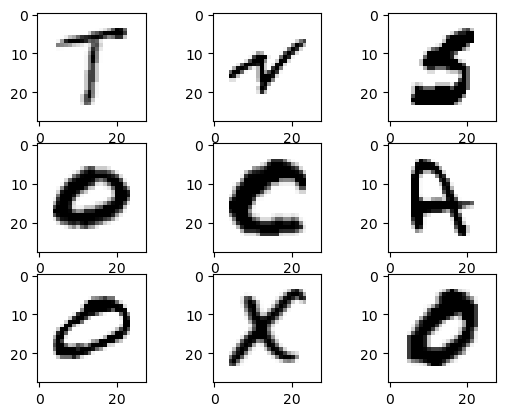

In [63]:
for i in range(1,10):
    plt.subplot(330+i)
    plt.imshow(X_train[20+i].reshape(28,28),cmap='Greys')
    
plt.show()

## CNN

In [81]:
brain = models.Sequential([

    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(26,activation='softmax')
    
    
    
])

In [82]:
opt = optimizers.Adam(learning_rate = 0.0005,decay = 1e-6)

In [83]:
brain.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy',metrics.AUC()])

In [84]:
history = brain.fit(X_train2,Y_train2,epochs=10,verbose=1,validation_data=(X_test2,Y_test2))

Epoch 1/10
9312/9312 [==============================] - 124s 13ms/step - loss: 0.2161 - accuracy: 0.9390 - auc_4: 0.9962 - val_loss: 0.0519 - val_accuracy: 0.9851 - val_auc_4: 0.9990
Epoch 2/10
9312/9312 [==============================] - 120s 13ms/step - loss: 0.0818 - accuracy: 0.9777 - auc_4: 0.9985 - val_loss: 0.0373 - val_accuracy: 0.9893 - val_auc_4: 0.9992
Epoch 3/10
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0636 - accuracy: 0.9827 - auc_4: 0.9988 - val_loss: 0.0310 - val_accuracy: 0.9913 - val_auc_4: 0.9993
Epoch 4/10
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0537 - accuracy: 0.9853 - auc_4: 0.9990 - val_loss: 0.0301 - val_accuracy: 0.9918 - val_auc_4: 0.9993
Epoch 5/10
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0480 - accuracy: 0.9871 - auc_4: 0.9990 - val_loss: 0.0276 - val_accuracy: 0.9925 - val_auc_4: 0.9993
Epoch 6/10
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0429

In [85]:
brain.save("improved_model")

INFO:tensorflow:Assets written to: improved_model\assets


In [86]:
brain2 = tf.keras.models.load_model('improved_model')

In [87]:
brain2.evaluate(X_test2,Y_test2)

2328/2328 [==============================] - 10s 4ms/step - loss: 0.0205 - accuracy: 0.9945 - auc_4: 0.9995


[0.020540999248623848, 0.994522750377655, 0.9994521737098694]

In [92]:
X_test2[0].shape

(28, 28, 1)

In [93]:
Y_pred = brain.predict(X_test2)

In [94]:
Y_pred

array([[2.5747722e-09, 2.1820821e-09, 4.6271794e-07, ..., 6.8407155e-12,
        7.9973202e-11, 1.2153133e-09],
       [3.4546348e-12, 1.8856614e-08, 3.2947327e-08, ..., 1.0329468e-10,
        8.7028185e-10, 2.0806726e-10],
       [1.3046129e-09, 7.3861784e-08, 7.1021894e-08, ..., 5.9325556e-10,
        5.9859495e-08, 1.3827112e-09],
       ...,
       [4.1767527e-07, 1.9430558e-07, 1.8477622e-06, ..., 2.1385716e-08,
        5.1253573e-07, 2.4594160e-08],
       [1.4071247e-08, 1.0189917e-08, 2.6409330e-07, ..., 1.1390550e-08,
        5.3774835e-07, 1.9610649e-09],
       [1.8823840e-11, 8.3118423e-10, 5.8813315e-11, ..., 2.0597154e-11,
        7.3376485e-11, 7.3313735e-13]], dtype=float32)

In [95]:
Y_pred = [np.argmax(element) for element in Y_pred]

In [96]:
Y_pred

[6,
 18,
 14,
 20,
 17,
 9,
 24,
 14,
 3,
 18,
 20,
 12,
 19,
 18,
 0,
 13,
 11,
 19,
 14,
 14,
 14,
 15,
 13,
 6,
 15,
 2,
 10,
 19,
 22,
 2,
 20,
 24,
 4,
 25,
 2,
 0,
 7,
 14,
 14,
 22,
 18,
 2,
 1,
 2,
 0,
 7,
 0,
 19,
 18,
 14,
 13,
 13,
 3,
 15,
 18,
 24,
 15,
 1,
 7,
 15,
 3,
 14,
 2,
 18,
 13,
 14,
 9,
 15,
 14,
 22,
 13,
 3,
 20,
 20,
 14,
 14,
 19,
 22,
 15,
 18,
 14,
 2,
 15,
 20,
 20,
 14,
 14,
 18,
 14,
 19,
 11,
 15,
 22,
 2,
 20,
 18,
 10,
 17,
 17,
 1,
 0,
 0,
 20,
 19,
 14,
 20,
 7,
 14,
 11,
 15,
 14,
 16,
 14,
 13,
 16,
 0,
 1,
 13,
 19,
 14,
 11,
 10,
 20,
 0,
 4,
 12,
 18,
 17,
 19,
 16,
 17,
 24,
 14,
 0,
 18,
 14,
 1,
 4,
 2,
 18,
 20,
 2,
 4,
 18,
 18,
 19,
 14,
 5,
 13,
 22,
 9,
 0,
 20,
 14,
 23,
 3,
 22,
 2,
 14,
 9,
 13,
 12,
 20,
 18,
 16,
 20,
 13,
 12,
 20,
 25,
 19,
 3,
 11,
 0,
 13,
 18,
 17,
 13,
 18,
 18,
 0,
 15,
 13,
 14,
 12,
 20,
 14,
 0,
 14,
 12,
 7,
 19,
 14,
 14,
 14,
 16,
 24,
 14,
 18,
 20,
 20,
 18,
 14,
 1,
 14,
 22,
 18,
 14,
 2,
 18,
 4,

In [105]:
Y_pred = [word_dict[i] for i in Y_pred] 

In [107]:
Y_pred

['G',
 'S',
 'O',
 'U',
 'R',
 'J',
 'Y',
 'O',
 'D',
 'S',
 'U',
 'M',
 'T',
 'S',
 'A',
 'N',
 'L',
 'T',
 'O',
 'O',
 'O',
 'P',
 'N',
 'G',
 'P',
 'C',
 'K',
 'T',
 'W',
 'C',
 'U',
 'Y',
 'E',
 'Z',
 'C',
 'A',
 'H',
 'O',
 'O',
 'W',
 'S',
 'C',
 'B',
 'C',
 'A',
 'H',
 'A',
 'T',
 'S',
 'O',
 'N',
 'N',
 'D',
 'P',
 'S',
 'Y',
 'P',
 'B',
 'H',
 'P',
 'D',
 'O',
 'C',
 'S',
 'N',
 'O',
 'J',
 'P',
 'O',
 'W',
 'N',
 'D',
 'U',
 'U',
 'O',
 'O',
 'T',
 'W',
 'P',
 'S',
 'O',
 'C',
 'P',
 'U',
 'U',
 'O',
 'O',
 'S',
 'O',
 'T',
 'L',
 'P',
 'W',
 'C',
 'U',
 'S',
 'K',
 'R',
 'R',
 'B',
 'A',
 'A',
 'U',
 'T',
 'O',
 'U',
 'H',
 'O',
 'L',
 'P',
 'O',
 'Q',
 'O',
 'N',
 'Q',
 'A',
 'B',
 'N',
 'T',
 'O',
 'L',
 'K',
 'U',
 'A',
 'E',
 'M',
 'S',
 'R',
 'T',
 'Q',
 'R',
 'Y',
 'O',
 'A',
 'S',
 'O',
 'B',
 'E',
 'C',
 'S',
 'U',
 'C',
 'E',
 'S',
 'S',
 'T',
 'O',
 'F',
 'N',
 'W',
 'J',
 'A',
 'U',
 'O',
 'X',
 'D',
 'W',
 'C',
 'O',
 'J',
 'N',
 'M',
 'U',
 'S',
 'Q',
 'U',
 'N'

In [100]:
brain.predict(X_test2[0].reshape(1,28,28,1))

array([[2.57481125e-09, 2.18223173e-09, 4.62765598e-07, 3.34096605e-11,
        2.94553701e-07, 1.40092444e-08, 9.99999166e-01, 9.06817232e-10,
        8.46086673e-11, 1.50707102e-09, 2.19833006e-11, 3.33567796e-09,
        1.79249926e-09, 1.36134908e-12, 6.97897384e-09, 3.31821792e-11,
        1.94821759e-08, 1.01735235e-11, 2.43765346e-08, 1.13594190e-10,
        6.61959421e-09, 7.74242226e-10, 2.32760165e-11, 6.84344335e-12,
        8.00275263e-11, 1.21606458e-09]], dtype=float32)

In [102]:
word_dict[0]

'A'

In [118]:
fig,axes = plt.subplots(3,3,figsize=(8,9))

In [121]:
axes = axes.flatten()

In [130]:
for i, ax in enumerate(axes):
    img = X_train[i].reshape(28,28)
    ax.imshow(img,cmap='Greys')
    #ax.set_title("Prediction : ")
    ax.grid()
    
plt.show()